# TFC - DEISI258 - Modelamento multi-agente de interações em grupos sociais

Aluno: **Paulo Pinto** a21906966

Orientador: **Manuel Marques Pita**


Neste notebook:
- É feita a conexão ao NetLogo através da biblioteca pyNetLogo
- É carregado o modelo desenvolvido para o âmbito do TFC
- A simulação é executada 50 vezes, para obter significância estatística
- Os dados são visualizados e analisados

## Setup

### Setup Virtual Environment

Create virtual environment 'venv' -> `python3 -m venv venv` or `python3.[version_number] -m venv venv`

Activate 'venv' -> Linux `source venv/bin/activate` | Windows `. venv\scripts\activate`

Install required packages -> `pip install -r requirements.txt`

Errors - 
- `No module named 'pip'` -> python -m ensurepip
- `No module named jpype` -> pip install jpype1

### Imports

In [1]:
import os
from sys import platform

import pyNetLogo

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from collections import Counter

import seaborn as sns

### Connect to NetLogo and Load model

In [2]:
# add ( NetLogo : path )  as an environment variable
if platform == "linux":
    os.environ["NetLogo"] = "/home/paulo/Desktop/TFC/NetLogo-6.2.1-64/NetLogo 6.2.1"
    
for key in os.environ:
    if key.lower() == "netlogo":
        print(f"{key} -> {os.environ[key]}")

# connect to netlogo
netlogo = pyNetLogo.NetLogoLink(
    gui=False,
    netlogo_home = os.environ['NetLogo'],
    netlogo_version="6.2",
)

def load_model():
    if platform == "linux":
        model_path = os.path.abspath(os.getcwd()) + "/files/knowledge_units_with_board.nlogo"    
    elif platform == "win32":
        model_path = os.path.abspath(os.getcwd()) + "\\files\\knowledge_units_with_board.nlogo"

    netlogo.load_model(model_path)
    netlogo.command("set number_of_agents 5")
    netlogo.command("setup")

load_model()

NetLogo -> /home/paulo/Desktop/TFC/NetLogo-6.2.1-64/NetLogo 6.2.1
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3


In [3]:
# todo -> 
# reduce vars -> simplify netlogo code

# multithreading for running all sims at once ! https://docs.python.org/3/library/multiprocessing.html

## Get some data

In [74]:
netlogo.command("set female_prob_exploit 0.38")
netlogo.command("set male_prob_exploit 0.38")
netlogo.command('set Method "Attention Norm - General"')

simulation_times = 25
iterations = 50

simulation_reports = []

for _ in range(simulation_times):
    netlogo.command("setup")
    topic_divergence = netlogo.repeat_report(["compat_ratio"], iterations)
    simulation_reports.append(topic_divergence)


# TODO histograma distrib. tamanhos bloco in/out topic
# https://i.stack.imgur.com/ATCHO.png
# report = netlogo.report("compat-ratio-report")

4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 3 | M - 2
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 3 | M - 2
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 3 | M - 2
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 agents left
1 agents left
0 agents left

MF RATIO -> F - 2 | M - 3
4 agents left
3 agents left
2 

In [70]:
# gets messages, returns in/out of topic lengths
# [1, 0, 0, 0, 1, 1] -> [[3], [1, 2]]
def split_topics(messages):
    topic = [[],[]]

    prev_compat = 1

    for curr_compat in messages:
        if curr_compat == -1 or curr_compat == "-1": curr_compat = 0
        if prev_compat == curr_compat: # continue last count
            topic[curr_compat][len(topic[curr_compat]) - 1] += 1
        else: # create new count
            topic[curr_compat].append(1)
        
        prev_compat = curr_compat
    
    print(topic)
    return topic

In [75]:
in_topic = []
out_topic = []

for x in simulation_reports:
   # print(x.to_string())
   in_, out_ = split_topics(x["compat_ratio"].astype(int))
   in_topic += in_
   out_topic += out_

print(f"results\n{in_topic=}\n{out_topic=} ")

[[51], []]
[[5, 1, 1, 32], [2, 1, 9]]
[[1, 49], [1]]
[[5, 4, 19, 9], [2, 11, 1]]
[[51], []]
[[39, 2, 8], [1, 1]]
[[51], []]
[[51], []]
[[11], [40]]
[[1, 14, 1, 20], [1, 7, 7]]
[[1, 6], [44]]
[[1, 32], [18]]
[[1, 20, 15], [2, 11, 2]]
[[51], []]
[[2, 48], [1]]
[[23, 4], [6, 18]]
[[2, 8], [2, 39]]
[[1, 1, 1, 15], [1, 31, 1]]
[[33, 4, 12], [1, 1]]
[[51], []]
[[1, 42], [8]]
[[9, 2, 34], [3, 3]]
[[3, 47], [1]]
[[1, 5, 40], [2, 3]]
[[5, 35], [11]]
results
in_topic=[51, 5, 1, 1, 32, 1, 49, 5, 4, 19, 9, 51, 39, 2, 8, 51, 51, 11, 1, 14, 1, 20, 1, 6, 1, 32, 1, 20, 15, 51, 2, 48, 23, 4, 2, 8, 1, 1, 1, 15, 33, 4, 12, 51, 1, 42, 9, 2, 34, 3, 47, 1, 5, 40, 5, 35]
out_topic=[2, 1, 9, 1, 2, 11, 1, 1, 1, 40, 1, 7, 7, 44, 18, 2, 11, 2, 1, 6, 18, 2, 39, 1, 31, 1, 1, 1, 8, 3, 3, 1, 2, 3, 11] 


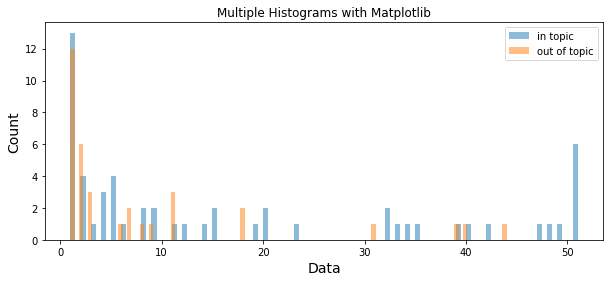

In [81]:
plt.figure(figsize=(10,4))
plt.hist(in_topic, bins=100, alpha=0.5, label="in topic")
plt.hist(out_topic, bins=100, alpha=0.5, label="out of topic")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

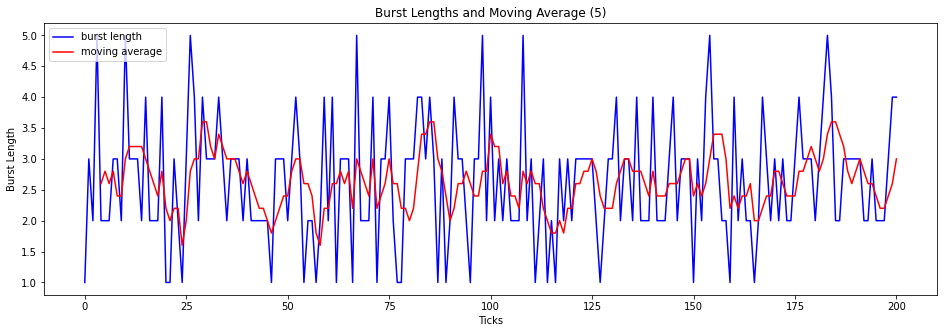

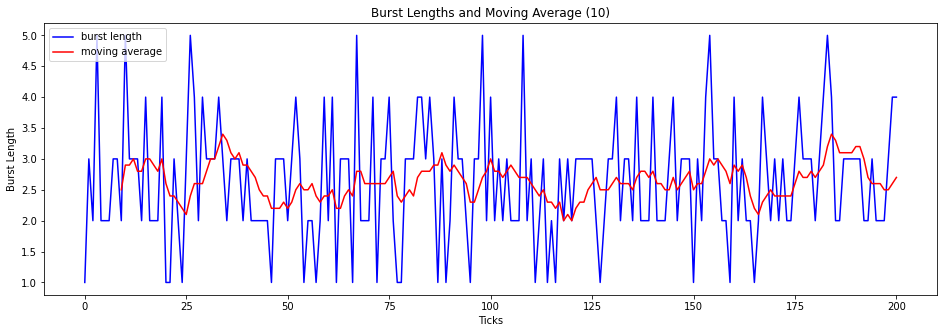

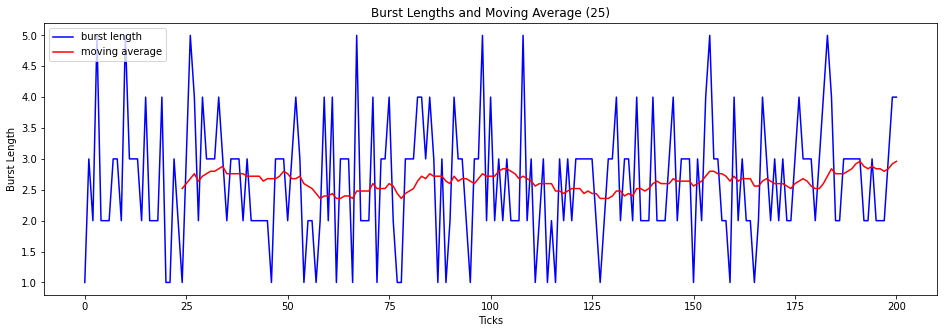

In [42]:
iterations = 200
repeat_report = netlogo.repeat_report(["length last [board_history] of one-of boards"], iterations)

for window_size in [5,10,25]:
    roll = repeat_report.rolling(window=window_size).mean()

    plt.figure(figsize=(16, 5))
    plt.plot(repeat_report, 'b-', label='burst length')
    plt.plot(roll, 'r-', label='moving average')

    plt.title(f"Burst Lengths and Moving Average ({window_size})")
    plt.ylabel('Burst Length')
    plt.xlabel('Ticks')
    plt.legend(loc='upper left')
    plt.show()

<AxesSubplot:title={'center':'Gender Participation / Tick'}, xlabel='Tick', ylabel='Gender Participation'>

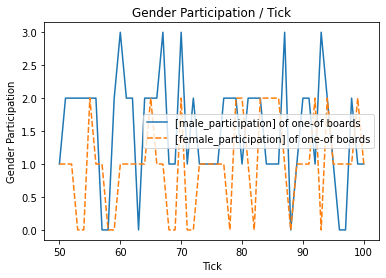

In [5]:
netlogo.command("set female_prob_exploit 0.5")
netlogo.command("set male_prob_exploit 0.3")

iterations = 50
report = netlogo.repeat_report(\
    ["[male_participation] of one-of boards", "[female_participation] of one-of boards"],
    iterations)

fig, ax = plt.subplots()
ax.set_xlabel("Tick")
ax.set_ylabel("Gender Participation")
plt.title("Gender Participation / Tick")
sns.lineplot(data=report.iloc[:])

# report.iloc[0] get by tick

### Graphs

In [6]:
def plot_1d_arr(arr, ylabel, aspect=70):
    df = pd.DataFrame(arr)

    fig, ax = plt.subplots()
    ax.set_aspect(aspect)
    ax.set_xlabel("Tick")
    ax.set_ylabel(ylabel)
    fig.patch.set_facecolor('white')
    plt.title(f"{ylabel} / Tick")

    sns.lineplot(data=df, x=range(len(arr)), y=df[0])
    # print(df.describe())

## Helper

### Manage Simulation

In [7]:
def show_sim_stats():
    """prints graph pertaining to the ran simulation"""
    iterations = 50
    male_part, female_part = netlogo.repeat_report(\
        ["[male_participation] of one-of boards", "[female_participation] of one-of boards", "compat_ratio", "[ratio] of one-of boards"],\
    iterations)

    plot_1d_arr(female_part, ylabel="F Participation")
    plot_1d_arr(male_part, ylabel="M Participation")
    plot_1d_arr(netlogo.report("burst-length-report"), ylabel="Burst Length", aspect=20)

### Setup Scenarios

In [8]:
# Scenario:sub-scenario : [Attention Norm, females, males, female_prob_exploit, male_prob_exploit]
scenarios = {
    # Working class
    1.1 : ["General", 1, 1, 0.45, 0.25],
    1.2 : ["General", 2, 1, 0.45, 0.25],
    1.3 : ["General", 1, 2, 0.45, 0.25],
    1.4 : ["Gendered", 2, 1, 0.45, 0.25],
    1.5 : ["Gendered", 1, 2, 0.45, 0.25],
    
    # Upper class
    2.1 : ["General", 1, 1, 0.85, 0.8],
    2.2 : ["General", 2, 1, 0.85, 0.8],
    2.3 : ["General", 1, 2, 0.85, 0.8],
    2.4 : ["Gendered", 2, 1, 0.85, 0.8],
    2.5 : ["Gendered", 1, 2, 0.85, 0.8],

    # Middle class
    3.1 : ["General", 1, 1, 0.6, 0.5],
    3.2 : ["General", 2, 1, 0.6, 0.5],
    3.3 : ["General", 1, 2, 0.6, 0.5],
    3.4 : ["Gendered", 2, 1, 0.6, 0.5],
    3.5 : ["Gendered", 1, 2, 0.6, 0.5],   
}

In [9]:
# old scenarios
# scenarios = {
#     # Scenario:sub-scenario : [Attentio Norm, females, males, female_prob_exploit, male_prob_exploit]
#     # Working class
#     1.1 : ["General", 1, 1, 0.65, 0.25],
#     1.2 : ["General", 2, 1, 0.65, 0.25],
#     1.3 : ["Gendered", 2, 1, 0.65, 0.25],
    
#     # Middle class
#     2.1 : ["General", 1, 1, 0.7, 0.5],
#     2.2 : ["General", 2, 1, 0.7, 0.5],
#     2.3 : ["Gendered", 2, 1, 0.7, 0.5],
    
#     # Upper class
#     3.1 : ["General", 1, 1, 0.85, 0.75],
#     3.2 : ["General", 2, 1, 0.85, 0.75],
#     3.3 : ["Gendered", 2, 1, 0.85, 0.75],
# }

# run_scenario(*scenarios[1.1], 1.1, 50)

## Run Simulation (Normal Divergence)

### Topic Divergence (-1 / 1)

In [10]:
def plot_topic(indexes, data, in_out, scenario):

    if in_out not in ["in", "out", "polarised"]: 
        print("invalid in / out")
        return
    
    topic_print = 'In-Topic' if in_out == 'in' else 'Out-of-Topic' if in_out == 'out' else 'Polarised'
    
    plt.ylabel("Count")

    plt.xlabel(f"{topic_print} Length")

    plt.title(f"{scenario} Lengths of {topic_print} Discussions")
    plt.bar(indexes, list(data.values()))
    plt.xticks(indexes, list(data.keys()))

    plt.savefig(f"plots/{scenario}_{in_out}_topic.png")
    plt.show()

In [11]:
# gets messages, returns in/out of topic lengths
# [1, 0, 0, 0, 1, 1] -> [[3], [1, 2]]
def split_topics(messages):
    topic = [[],[]]
    print(messages)
    # convert to int
    messages = [int(e) for e in messages]
    print(messages)
    prev_compat = 1 - messages[0]

    for curr_compat in messages:
        if curr_compat == -1 or curr_compat == "-1": curr_compat = 0
        if prev_compat == curr_compat: # continue last count
            topic[curr_compat][len(topic[curr_compat]) - 1] += 1
        else: # create new count
            topic[curr_compat].append(1)
        
        prev_compat = curr_compat
    
    print(topic)
    return topic

# concat all in/out of topic lengths
def read_in_topic(scenario, divergency):

    if divergency:
        file_path = f"outputs/{scenario}_compat_ratios.csv"
    else:
        file_path = f"outputs/{scenario}_topic_data.csv"

    in_topic = []
    out_topic = []

    with open(file_path) as fp:
        
        for l in fp.readlines():
            # -1 -> 0 | 1 -> 1
            # print(l.split())
            # lst = [e for e in l if e.isalnum() or e == "-1"]
            lst = [e for e in l.split(",")]
            print(f"{lst=}")
            topics = split_topics(lst)
            out_topic += topics[0]
            in_topic += topics[1]

    return out_topic, in_topic

def run_scenario(method, females, males, f_exploit, m_exploit, scenario, iterations = 5):
    file_path = f"outputs/{scenario}_compat_ratios.csv"
    if os.path.exists(file_path): os.remove(file_path) # reset file

    netlogo.command(f'set Method "Attention Norm - {method}"')
    netlogo.command(f'set females {females}')
    netlogo.command(f'set males {males}')
    netlogo.command(f'set female_prob_exploit {f_exploit}')
    netlogo.command(f'set male_prob_exploit {m_exploit}')

    for _ in range(iterations):
        netlogo.command("setup")
        netlogo.command("repeat 50 [go]")

        messages = netlogo.report("compat-ratio-report").astype(int)
        with open(file_path, "a+") as fp:
            # fp.write(f"{[x for x in messages]}")
            fp.write(','.join(str(x) for x in messages))
            fp.write("\n")

    # return the length counts for in/out topic
    out_topic, in_topic = read_in_topic(scenario, divergency = True)

    out_topic = list(map(int,out_topic)) # map here is irrelevant?
    in_topic = list(map(int,in_topic))
    return  dict(sorted(Counter(out_topic).items())), dict(sorted(Counter(in_topic).items())), 
    # return Counter(out_topic), Counter(in_topic)

    # show_topic_divergence(scenario)
    # show_sim_stats()

def show_topic_divergence(scenario):
    topic = [[],[]]

    messages = netlogo.report("get-in-topic").astype(int)
    # should_be = [[2, 1, 3], [3, 1, 1, 4]]

    with open(f"plots/{scenario}_in-topic-data.csv", "a+") as fp:
        fp.write(f"{list(messages)}")
        fp.write("\n")
    
    prev_compat = False

    for curr_compat in messages:
        
        if prev_compat == curr_compat: # continue last count
            topic[curr_compat][len(topic[curr_compat])-1] += 1
        else: # create new count
            topic[curr_compat].append(1)
        
        prev_compat = curr_compat

    # print(topic)

    sns.displot(topic[0], kde=True).set(title="Lengths of Out-of-Topic Discussions")
    x_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    plt.xticks(x_ticks)

    sns.displot(topic[1], kde=True).set(title="Lengths of In-Topic Discussions")

### Run simulation

In [12]:
out_topic, in_topic = read_in_topic(2.3)

out_topic = list(map(int,out_topic))
in_topic = list(map(int,in_topic))

out_topic_counter = dict(sorted(Counter(out_topic).items()))
in_topic_counter = dict(sorted(Counter(in_topic).items()))

ind = np.arange(len(out_topic_counter))
data = out_topic_counter

scenario_id = 2.3

indexes = np.arange(len(out_topic_counter))

plot_topic(indexes, out_topic_counter, "out",  scenario_id)
plot_topic(indexes, out_topic_counter, "out",  scenario_id)

indexes = np.arange(len(in_topic_counter))

plot_topic(indexes, in_topic_counter, "in",  scenario_id)
plot_topic(indexes, in_topic_counter, "in",  scenario_id)

TypeError: read_in_topic() missing 1 required positional argument: 'divergency'

## Run Simulation Polarisation

### Topic Divergence (with Polarisation -1 / 0 / 1)

In [ ]:
def plot_from_files_polarised(scenario):
    # return the length counts for in/out topic
    out_topic, polarised_topic, in_topic = read_in_topic_polarised(scenario)
        
    out_topic_counter = dict(sorted(Counter(out_topic).items()))
    indexes = np.arange(len(out_topic_counter))
    plot_topic(indexes, out_topic_counter, "out",  scenario)
    
    in_topic_counter = dict(sorted(Counter(in_topic).items()))
    indexes = np.arange(len(in_topic_counter))
    plot_topic(indexes, in_topic_counter, "in",  scenario)

    polarised_topic_counter = dict(sorted(Counter(polarised_topic).items()))    
    indexes = np.arange(len(polarised_topic_counter))
    plot_topic(indexes, polarised_topic_counter, "polarised",  scenario)

    common_params = dict(bins=100, range=(1, 200), density = True)

    ax = plt.hist((out_topic, in_topic, polarised_topic), **common_params)
    plt.legend(["out of topic", "in topic", "polarised discussion"])
    plt.title("Type of Discussion Length")
    plt.ylabel("Prevalence")
    plt.xlabel("Length of Discussion")

In [ ]:
# compat-ratio-report-with-polarisation
def split_topics_polarised(messages):
    topic = [[],[],[]]
    # convert to int
    messages = [int(e) for e in messages]
    
    prev_compat = -1

    topic_indexes = {
        -1 : 0,
        0 : 1,
        1 : 2,
    }

    for curr_compat in messages:
        index = topic_indexes[curr_compat]
        
        if prev_compat == curr_compat: # continue last count    
            topic[index][len(topic[index]) - 1] += 1
        else: # create new count
            topic[index].append(1)
        
        prev_compat = curr_compat
    
    # print(topic)
    return topic

# concat all in/out of topic lengths
def read_in_topic_polarised(scenario):
    file_path = f"outputs/{scenario}_compat_ratios_polarisation.csv"

    in_topic = []
    out_topic = []
    polarised_topic = []

    with open(file_path) as fp:
        
        for l in fp.readlines():
            # -1 -> 0 | 1 -> 1
            # print(l.split())
            # lst = [e for e in l if e.isalnum() or e == "-1"]
            lst = [e for e in l.strip("\n").split(",")]
            # print(f"{lst=}")
            topics = split_topics_polarised(lst)
            out_topic += topics[0]
            polarised_topic += topics[1]
            in_topic += topics[2]

    return out_topic, polarised_topic, in_topic

def run_scenario_polarised(method, females, males, f_exploit, m_exploit, scenario, iterations = 1):
    file_path = f"outputs/{scenario}_compat_ratios_polarisation.csv"
    if os.path.exists(file_path): os.remove(file_path) # reset file

    netlogo.command(f'set Method "Attention Norm - {method}"')
    netlogo.command("set number_of_agents 15")
    netlogo.command(f'set females {females}')
    netlogo.command(f'set males {males}')
    netlogo.command(f'set female_prob_exploit {f_exploit}')
    netlogo.command(f'set male_prob_exploit {m_exploit}')

    for _ in range(iterations):    
        netlogo.command("setup")
        # netlogo.command("repeat 200 [go]")

        # messages = netlogo.report("compat-ratio-report-with-polarisation").astype(int)
        # messages = netlogo.repeat_report("compat_ratio", 200)
        report = netlogo.repeat_report(["[ratio] of one-of boards", "compat_ratio", "[male_participation] of one-of boards", "[female_participation] of one-of boards"], 20)
        report.to_csv(f"outputs/{scenario}_report.csv")
        # with open(file_path, "a+") as fp:
        #     fp.write(','.join(str(x) for x in messages))
        #     fp.write("\n")
    
    print(f"{scenario=} done")

In [ ]:
netlogo.command("setup")
# abou = netlogo.repeat_report("compat_ratio", 2)
# abou.to_csv("abou.csv")
# abou

### Run Simulation

In [ ]:
# for x in ["[ratio] of one-of boards", "compat_ratio", "divergencies_from_first_ku", "[male_participation] of one-of boards", "[female_participation] of one-of boards"]:
#     print(f"length of {x}")
netlogo.command("set number_of_agents 15")
netlogo.command("setup")

In [ ]:
report = netlogo.repeat_report(["[ratio] of one-of boards", "compat_ratio", "[male_participation] of one-of boards", "[female_participation] of one-of boards"], 20)
# report_div = netlogo.repeat_report(["divergencies_from_first_ku"], 2) divergencies first element is a 0 and not a []

In [ ]:
report.to_csv("aboubakar.csv")

In [ ]:
# scenario_ids = [1.2, 2.2, 2.3]
# for s in scenario_ids:
    # run_scenario_polarised(*scenarios[s], s)
run_scenario_polarised(*scenarios[1.1], 1.1, iterations=1)

In [ ]:
# messages = netlogo.report("compat-ratio-report").astype(int)
# file_path = f"outputs/1.1_compat_ratios.csv"
    
# with open(file_path, "a+") as fp:
#     fp.write(','.join(str(x) for x in messages))
#     fp.write("\n")

In [ ]:
reduced_scenarios = {
    # Working class
    1.1 : ["General", 1, 1, 0.45, 0.25],
    1.5 : ["Gendered", 1, 2, 0.45, 0.25],
    
    # Upper class    
    2.1 : ["General", 1, 1, 0.85, 0.8],
    2.5 : ["Gendered", 1, 2, 0.85, 0.8],
}

# run 3 scenarios
for scenario_id,v in reduced_scenarios.items():
    out_topic_counter, in_topic_counter = run_scenario(*v, scenario_id, 1)

    # sort
    out_topic_counter = dict(sorted(out_topic_counter.items()))
    in_topic_counter = dict(sorted(in_topic_counter.items()))

    indexes = np.arange(len(out_topic_counter))

    plot_topic(indexes, out_topic_counter, "out",  scenario_id)

    indexes = np.arange(len(in_topic_counter))

    plot_topic(indexes, in_topic_counter, "in",  scenario_id)

# TODO - NORMALIZED HISTOGRAM